In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [7]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
    'Month',
    'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    'O3',
    'temp_max',
    'temp_min',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag

df_final['O3_lag1'] = df_final['O3'].shift(1)
df_final['O3_lag2'] = df_final['O3'].shift(2)
df_final['O3_lag3'] = df_final['O3'].shift(3)

df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 3 to 1677
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1155 non-null   object 
 1   DayOfWeekNum   1155 non-null   int64  
 2   WeekOfYear     1155 non-null   int64  
 3   Month          1155 non-null   int64  
 4   IsWeekend      1155 non-null   int64  
 5   IsHoliday      1155 non-null   int64  
 6   NUMBER_INT     1155 non-null   int64  
 7   O3             1155 non-null   float64
 8   temp_max       1155 non-null   float64
 9   temp_min       1155 non-null   float64
 10  humidity_max   1155 non-null   float64
 11  O3_lag1        1155 non-null   float64
 12  O3_lag2        1155 non-null   float64
 13  O3_lag3        1155 non-null   float64
 14  temp_min_lag1  1155 non-null   float64
 15  temp_min_lag2  1155 non-null   float64
 16  temp_min_lag3  1155 non-null   float64
dtypes: float64(10), int64(6), object(1)
memory usage: 162.4+ 

,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,O3,temp_max,temp_min,humidity_max,O3_lag1,O3_lag2,O3_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
count,1155,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
unique,1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.005195,26.490043,6.511688,0.290909,0.022511,47.797403,52.077922,28.047619,17.547965,81.899567,52.010390,52.132468,52.138528,17.545628,17.545281,17.540519
std,NaN,2.015961,13.972325,3.206713,0.454378,0.148402,15.658526,16.816344,3.044232,2.765303,9.190849,16.610167,16.615197,16.597431,2.786599,2.801464,2.812291
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,14.000000,19.100000,7.700000,42.000000,14.000000,14.000000,14.000000,7.300000,7.300000,7.300000
25%,NaN,1.000000,15.000000,4.000000,0.000000,0.000000,36.000000,41.000000,26.000000,15.600000,77.000000,41.000000,41.000000,41.000000,15.600000,15.600000,15.500000
50%,NaN,3.000000,27.000000,7.000000,0.000000,0.000000,46.000000,50.000000,28.100000,18.100000,83.000000,50.000000,50.000000,50.000000,18.100000,18.100000,18.100000
75%,NaN,5.000000,38.000000,9.000000,1.000000,0.000000,59.000000,62.000000,30.150000,19.600000,89.000000,62.000000,62.000000,62.000000,19.600000,19.650000,19.650000


In [11]:
df_final.dtypes

Date              object
DayOfWeekNum       int64
WeekOfYear         int64
Month              int64
IsWeekend          int64
IsHoliday          int64
NUMBER_INT         int64
O3               float64
temp_max         float64
temp_min         float64
humidity_max     float64
O3_lag1          float64
O3_lag2          float64
O3_lag3          float64
temp_min_lag1    float64
temp_min_lag2    float64
temp_min_lag3    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
# df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,O3,temp_max,temp_min,humidity_max,O3_lag1,O3_lag2,O3_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
3,6,1,1,1,0,20,49.0,30.6,22.2,81.0,44.0,79.0,68.0,20.2,21.0,20.6
4,0,2,1,0,0,51,59.0,30.8,20.8,79.0,49.0,44.0,79.0,22.2,20.2,21.0
5,1,2,1,0,0,23,54.0,29.5,20.5,79.0,59.0,49.0,44.0,20.8,22.2,20.2
6,2,2,1,0,0,43,54.0,28.0,19.9,78.0,54.0,59.0,49.0,20.5,20.8,22.2
7,3,2,1,0,0,49,66.0,30.4,19.7,74.0,54.0,54.0,59.0,19.9,20.5,20.8


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,O3,temp_max,temp_min,humidity_max,O3_lag1,O3_lag2,O3_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1397,0,44,10,0,0,58,40.0,24.4,18.8,89.0,50.0,53.0,50.0,19.2,19.1,19.2
1398,1,44,10,0,0,49,59.0,29.6,17.6,85.0,40.0,50.0,53.0,18.8,19.2,19.1
1445,6,50,12,1,0,33,63.0,30.8,21.4,73.0,78.0,78.0,78.0,21.4,19.9,18.8
1446,0,51,12,0,0,53,51.0,30.5,20.6,68.0,63.0,78.0,78.0,21.4,21.4,19.9
1447,1,51,12,0,0,58,106.0,32.6,20.4,69.0,51.0,63.0,78.0,20.6,21.4,21.4


In [15]:
df_val.head(10)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,O3,temp_max,temp_min,humidity_max,O3_lag1,O3_lag2,O3_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1468,1,2,1,0,0,39,162.0,29.6,19.7,87.0,76.0,70.0,87.0,20.9,18.8,18.6
1469,2,2,1,0,0,49,71.0,29.4,19.0,78.0,162.0,76.0,70.0,19.7,20.9,18.8
1470,3,2,1,0,0,51,70.0,29.2,19.7,75.0,71.0,162.0,76.0,19.0,19.7,20.9
1471,4,2,1,0,0,53,62.0,30.2,20.3,73.0,70.0,71.0,162.0,19.7,19.0,19.7
1472,5,2,1,1,0,37,73.0,30.1,20.4,76.0,62.0,70.0,71.0,20.3,19.7,19.0
1473,6,2,1,1,0,23,50.0,30.6,20.2,81.0,73.0,62.0,70.0,20.4,20.3,19.7
1474,0,3,1,0,0,39,60.0,30.7,20.1,76.0,50.0,73.0,62.0,20.2,20.4,20.3
1475,1,3,1,0,0,46,65.0,32.6,21.1,76.0,60.0,50.0,73.0,20.1,20.2,20.4
1476,2,3,1,0,0,45,59.0,33.4,22.4,72.0,65.0,60.0,50.0,21.1,20.1,20.2
1477,3,3,1,0,0,41,62.0,32.2,21.1,76.0,59.0,65.0,60.0,22.4,21.1,20.1


In [16]:
df_val.tail(20)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,O3,temp_max,temp_min,humidity_max,O3_lag1,O3_lag2,O3_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1658,2,29,7,0,0,64,56.0,22.7,13.4,86.0,64.0,54.0,69.0,14.1,13.3,13.3
1659,3,29,7,0,0,75,58.0,22.0,13.2,71.0,56.0,64.0,54.0,13.4,14.1,13.3
1660,4,29,7,0,0,71,53.0,23.2,11.6,80.0,58.0,56.0,64.0,13.2,13.4,14.1
1661,5,29,7,1,0,46,54.0,22.2,12.9,80.0,53.0,58.0,56.0,11.6,13.2,13.4
1662,6,29,7,1,0,31,52.0,23.2,13.2,81.0,54.0,53.0,58.0,12.9,11.6,13.2
1663,0,30,7,0,0,92,49.0,23.9,14.5,82.0,52.0,54.0,53.0,13.2,12.9,11.6
1664,1,30,7,0,0,60,51.0,25.2,14.7,82.0,49.0,52.0,54.0,14.5,13.2,12.9
1665,2,30,7,0,0,54,53.0,27.5,14.7,77.0,51.0,49.0,52.0,14.7,14.5,13.2
1666,3,30,7,0,0,75,45.0,25.8,15.3,70.0,53.0,51.0,49.0,14.7,14.7,14.5
1667,4,30,7,0,0,76,55.0,25.4,15.9,80.0,45.0,53.0,51.0,15.3,14.7,14.7


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(10):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 80}
Best R-squared: 0.5686

Run 2 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 160}
Best R-squared: 0.5706

Run 3 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 12, 'n_estimators': 140}
Best R-squared: 0.5724

Run 4 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 60}
Best R-squared: 0.5720

Run 5 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 60}
Best R-squared: 0.5722

Run 6 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 60}
Best R-squared: 0.5720

Run 7 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 120}
Best R-squared: 0.5716

Run 8 Best Hyperparameters:
Best Hyperparame

### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,149.907718,12.243681,9.494297,16.771446,18.259811,0.488180,0.798144,"{'max_depth': 6, 'min_samples_split': 14, 'n_e...",0.568639
1,2,1,148.859338,12.200793,9.420071,16.602941,18.032313,0.491760,0.794634,"{'max_depth': 6, 'min_samples_split': 14, 'n_e...",0.570592
2,3,2,154.252305,12.419835,9.630334,16.997351,18.478409,0.473347,0.787112,"{'max_depth': 6, 'min_samples_split': 12, 'n_e...",0.572372
3,4,3,149.492423,12.226709,9.499159,16.874076,18.319237,0.489598,0.791677,"{'max_depth': 6, 'min_samples_split': 14, 'n_e...",0.571979
4,5,4,154.345032,12.423568,9.523741,16.723365,18.223283,0.473030,0.789932,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.572198
5,6,5,147.480495,12.144155,9.400309,16.620355,17.976648,0.496467,0.791877,"{'max_depth': 6, 'min_samples_split': 14, 'n_e...",0.571965
6,7,6,148.160737,12.172130,9.469681,16.716328,18.116118,0.494145,0.793313,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.571570
7,8,7,152.496194,12.348935,9.599228,16.895472,18.339059,0.479343,0.785558,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.570776
8,9,8,153.335541,12.382873,9.589154,16.913421,18.404721,0.476477,0.788724,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.571394
9,10,9,149.461164,12.225431,9.466078,16.696993,18.154464,0.489705,0.794009,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.574403


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,150.779095,12.278811,9.509205,16.781175,18.230406,0.485205,0.791498,0.571589
std,3.02765,3.02765,2.578473,0.104874,0.076687,0.132612,0.161578,0.008804,0.003778,0.001475
min,1.00000,0.00000,147.480495,12.144155,9.400309,16.602941,17.976648,0.473030,0.785558,0.568639
25%,3.25000,2.25000,149.009795,12.206952,9.466979,16.701827,18.125704,0.477193,0.789026,0.570930
50%,5.50000,4.50000,149.700071,12.235195,9.496728,16.747405,18.241547,0.488889,0.791777,0.571768
75%,7.75000,6.75000,153.125704,12.374388,9.572801,16.890123,18.334104,0.491246,0.793835,0.572144
max,10.00000,9.00000,154.345032,12.423568,9.630334,16.997351,18.478409,0.496467,0.798144,0.574403


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,97.090084,9.853430,8.121327,18.966724,21.154893,0.037664,0.689334
1,2,1,94.855426,9.739375,7.962604,18.507477,20.551901,0.059813,0.681268
2,3,2,96.844945,9.840983,8.118022,18.976191,21.085928,0.040094,0.677610
3,4,3,101.719579,10.085612,8.247019,19.220446,21.490234,-0.008223,0.660109
4,5,4,94.838273,9.738494,7.989221,18.551323,20.645397,0.059983,0.692642
5,6,5,91.415859,9.561164,7.778724,18.256863,20.205119,0.093906,0.683513
6,7,6,93.782705,9.684147,7.931685,18.433781,20.525761,0.070446,0.701814
7,8,7,94.773276,9.735157,7.987761,18.627425,20.750413,0.060628,0.689934
8,9,8,96.986914,9.848193,8.036553,18.768195,20.950106,0.038687,0.680206
9,10,9,98.165135,9.907832,8.072248,18.720932,20.912482,0.027008,0.680043


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,96.047220,9.799439,8.024516,18.702936,20.827223,0.048001,0.683647
std,3.02765,3.02765,2.795841,0.142277,0.127151,0.289630,0.369520,0.027712,0.011074
min,1.00000,0.00000,91.415859,9.561164,7.778724,18.256863,20.205119,-0.008223,0.660109
25%,3.25000,2.25000,94.789525,9.735991,7.968893,18.518439,20.575275,0.037920,0.680084
50%,5.50000,4.50000,95.850186,9.790179,8.012887,18.674179,20.831447,0.049954,0.682390
75%,7.75000,6.75000,97.064292,9.852121,8.106579,18.917091,21.051972,0.060467,0.689784
max,10.00000,9.00000,101.719579,10.085612,8.247019,19.220446,21.490234,0.093906,0.701814


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 6 with RMSE = 12.14
Best parameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 60}


### 1y

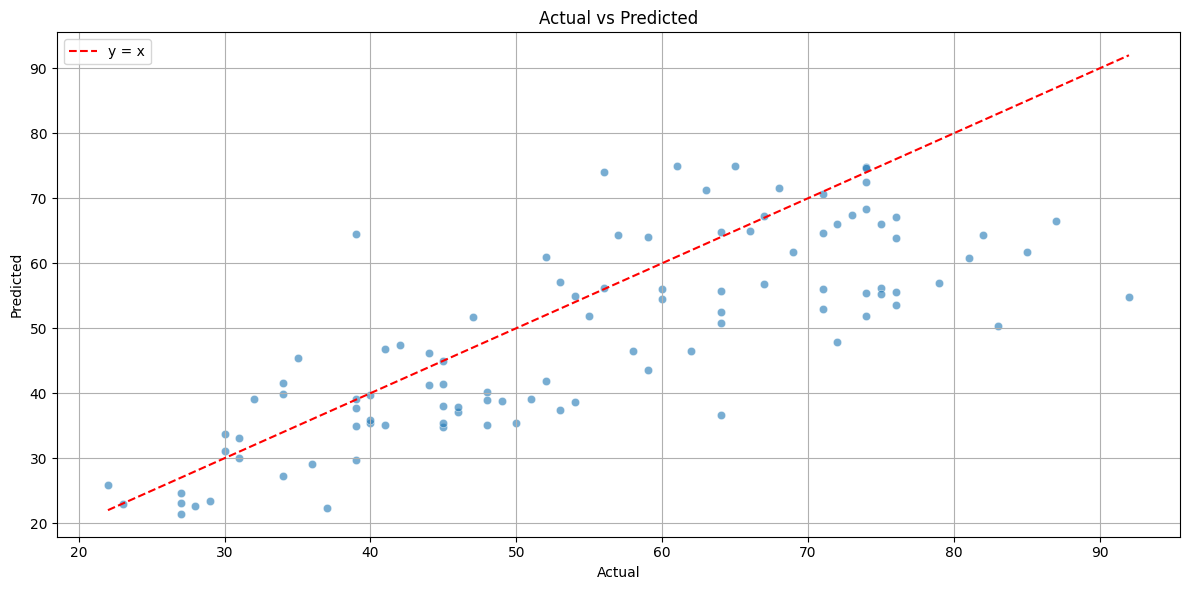

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

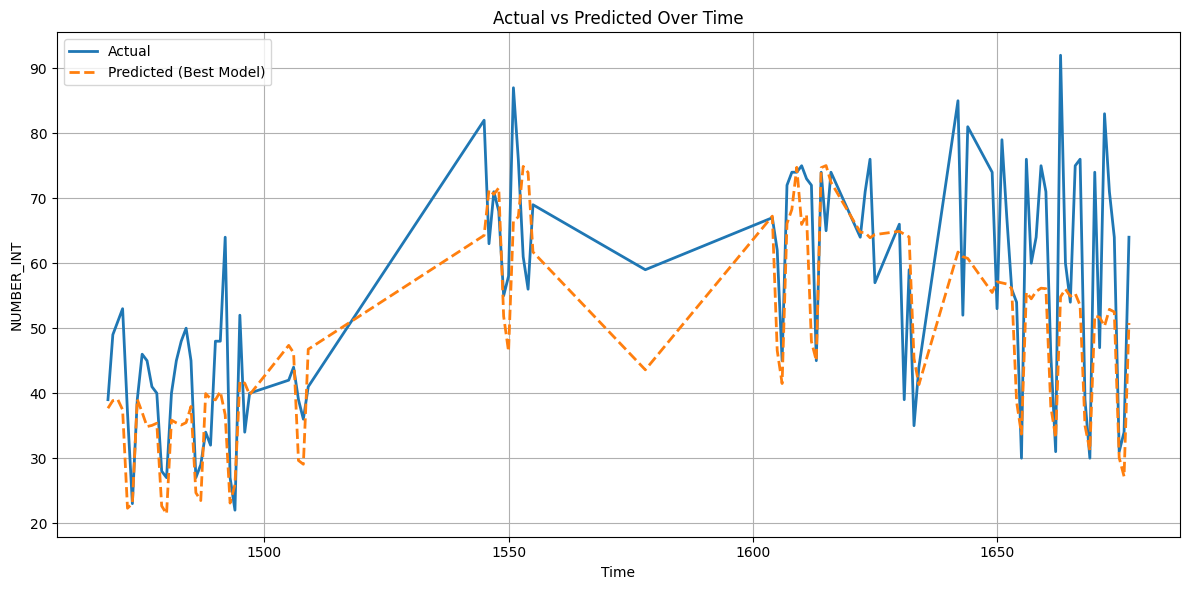

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

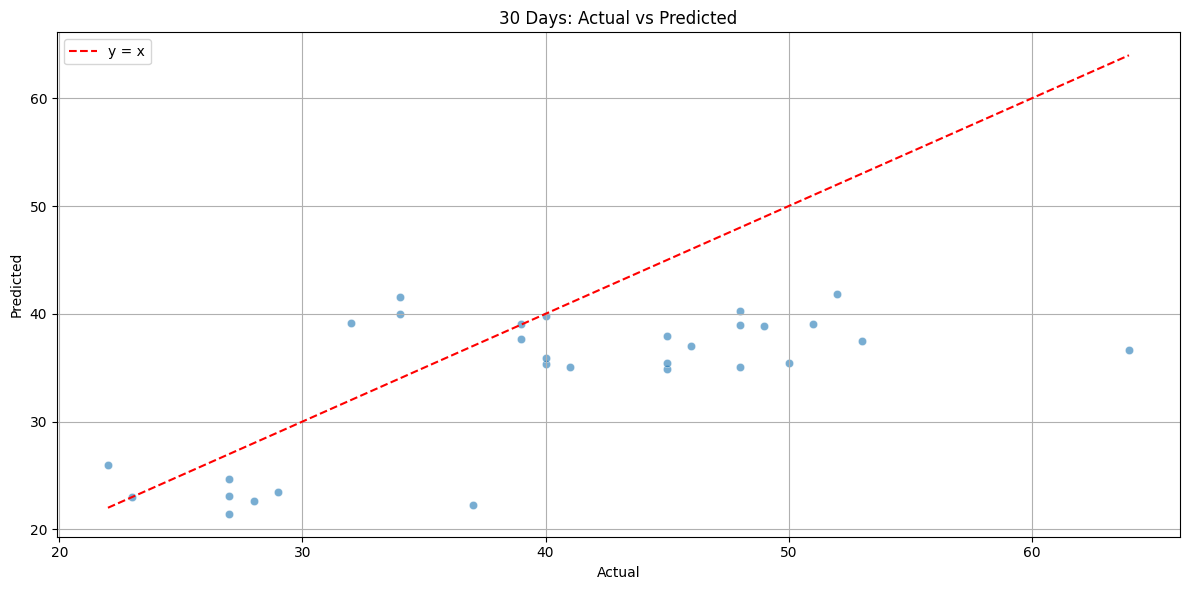

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


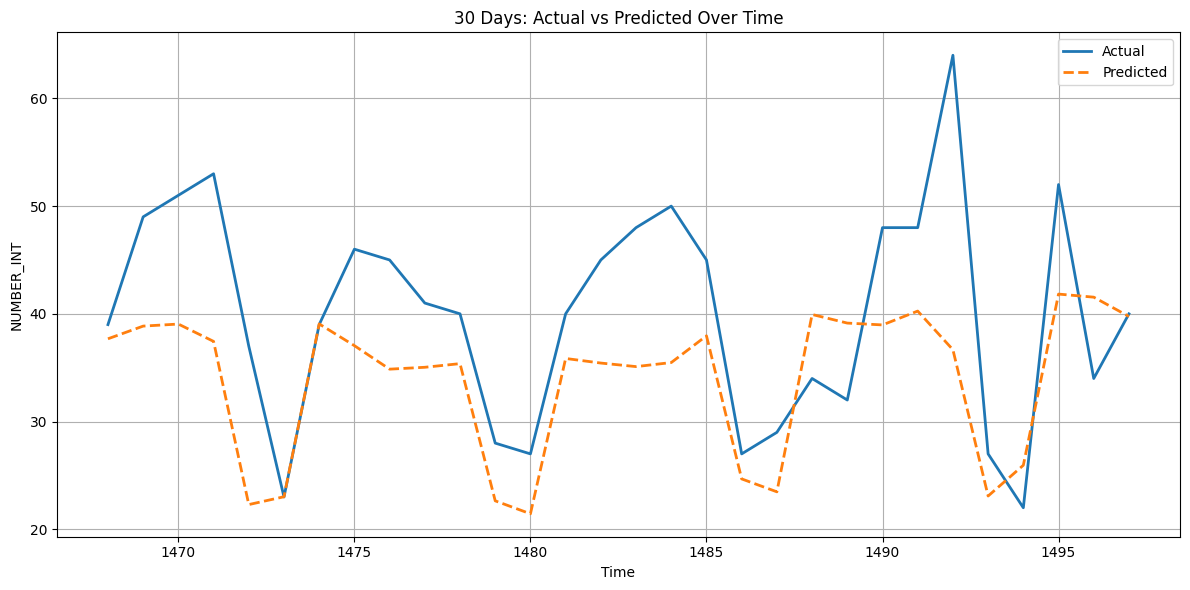

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

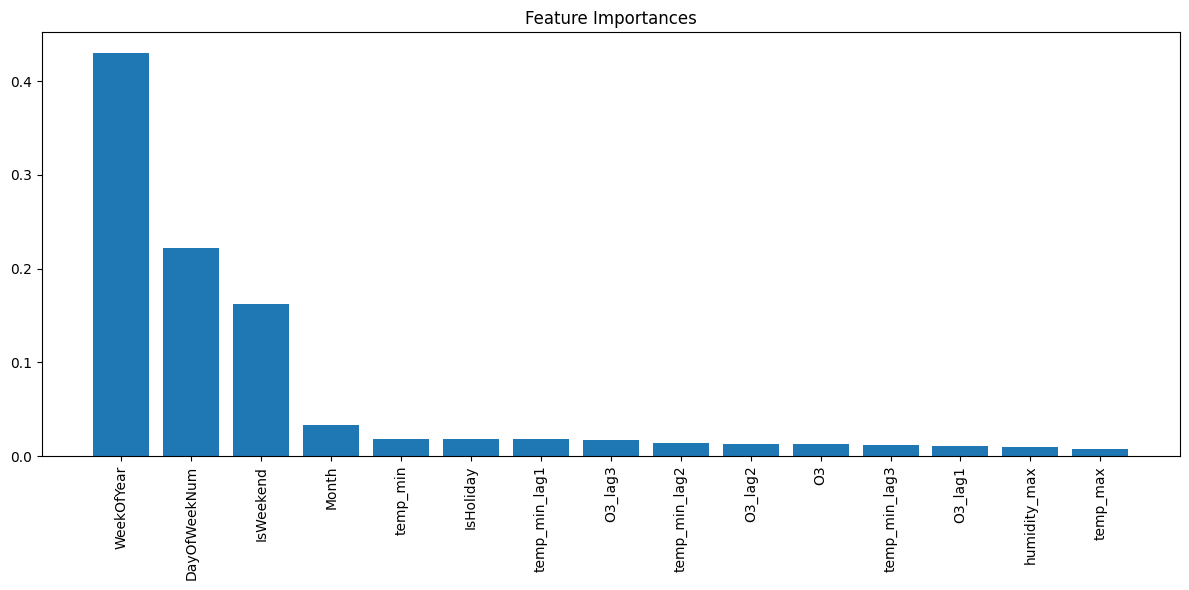

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()